# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [5]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

In [6]:
pip install pyarrow --quiet

Note: you may need to restart the kernel to use updated packages.


### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [7]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [8]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [9]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


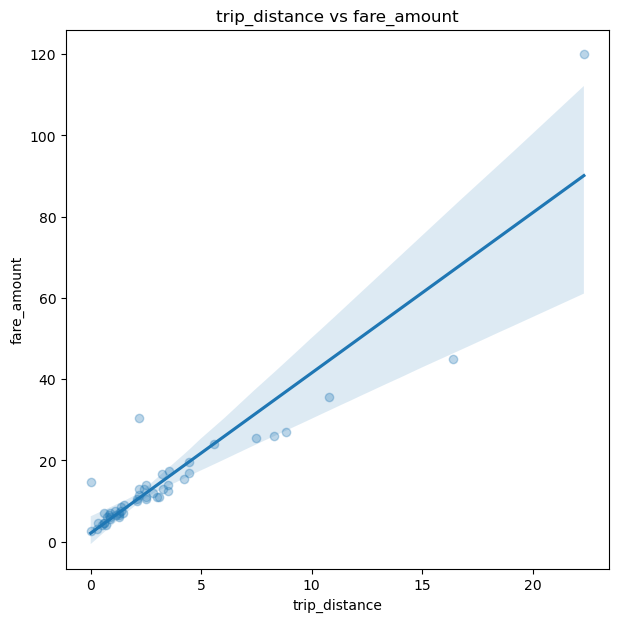

In [10]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
lower_bound = pd.to_datetime('2022-01-01')
upper_bound = pd.to_datetime('2022-02-28')

df_yellow_1 = df_yellow[(df_yellow['tpep_pickup_datetime'] >= lower_bound) & (df_yellow['tpep_pickup_datetime'] <= upper_bound)]
df_green_1 = df_green[(df_green['lpep_pickup_datetime'] >= lower_bound) & (df_green['lpep_pickup_datetime'] <= upper_bound)]

In [13]:
df_yellow_2=df_yellow_1.dropna().drop(columns=["RatecodeID","store_and_fwd_flag","PULocationID","DOLocationID","payment_type","mta_tax","tolls_amount","improvement_surcharge","congestion_surcharge","airport_fee"])

In [14]:
df_green_2=df_green_1.drop(columns=["RatecodeID","PULocationID","DOLocationID","trip_type","store_and_fwd_flag","payment_type","mta_tax","tolls_amount","improvement_surcharge","congestion_surcharge"])

In [15]:
# Step 2: Summarize the Data
df_yellow_2.describe()

,VendorID,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount
count,5.170774e+06,5.170774e+06,5.170774e+06,5.170774e+06,5.170774e+06,5.170774e+06,5.170774e+06
mean,1.697480e+00,1.391668e+00,3.077565e+00,1.287439e+01,1.041539e+00,2.425413e+00,1.916461e+01
std,4.593492e-01,9.841640e-01,4.106972e+00,1.767979e+02,1.241701e+00,2.807513e+00,1.770179e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+02,-4.500000e+00,-1.880000e+02,-6.003000e+02
25%,1.000000e+00,1.000000e+00,1.050000e+00,6.500000e+00,0.000000e+00,9.800000e-01,1.162000e+01
50%,2.000000e+00,1.000000e+00,1.740000e+00,9.000000e+00,5.000000e-01,2.000000e+00,1.476000e+01
75%,2.000000e+00,1.000000e+00,3.100000e+00,1.400000e+01,2.500000e+00,3.050000e+00,2.016000e+01
max,2.000000e+00,9.000000e+00,6.510000e+02,4.010923e+05,3.350000e+01,8.888800e+02,4.010956e+05


In [16]:
df_green_2.describe()

,VendorID,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount
count,129380.000000,115892.000000,129380.000000,129380.00000,129380.000000,129380.000000,129380.000000
mean,1.850417,1.262822,87.174174,14.00198,0.351161,1.739018,17.654688
std,0.356663,0.887293,3144.241476,12.20714,0.659118,2.844203,13.844335
min,1.000000,0.000000,0.000000,-165.00000,-4.500000,-0.990000,-165.300000
25%,2.000000,1.000000,1.100000,7.00000,0.000000,0.000000,9.490000
50%,2.000000,1.000000,1.910000,10.50000,0.000000,1.000000,14.050000
75%,2.000000,1.000000,3.530000,17.00000,0.500000,2.700000,21.300000
max,2.000000,9.000000,259777.570000,604.50000,4.500000,250.000000,605.300000


We have started by removing some of the columns, so it is more readable both with the yellow and the green

In [17]:
df_yellow_sorted=df_yellow[(df_yellow.trip_distance<100)&((df_yellow.tip_amount>=0))&(df_yellow.passenger_count>0)]
df_green_sorted=df_green[(df_green.trip_distance<100)&((df_green.tip_amount>=0))&(df_green.passenger_count>0)]

# As seen in the above scatterplots, the data hasn't been filtered correctly, by the first given code. We will therefore remowe
# any outliers depending on the dates:
lower_bound = pd.to_datetime('2022-01-01')
upper_bound = pd.to_datetime('2022-03-31')

df_yellow_sorted_dates = df_yellow_sorted[(df_yellow_sorted['tpep_pickup_datetime'] >= lower_bound) & (df_yellow_sorted['tpep_pickup_datetime'] <= upper_bound)]
df_green_sorted_dates = df_green_sorted[(df_green_sorted['lpep_pickup_datetime'] >= lower_bound) & (df_green_sorted['lpep_pickup_datetime'] <= upper_bound)]

<Axes: xlabel='tpep_pickup_datetime', ylabel='trip_distance'>

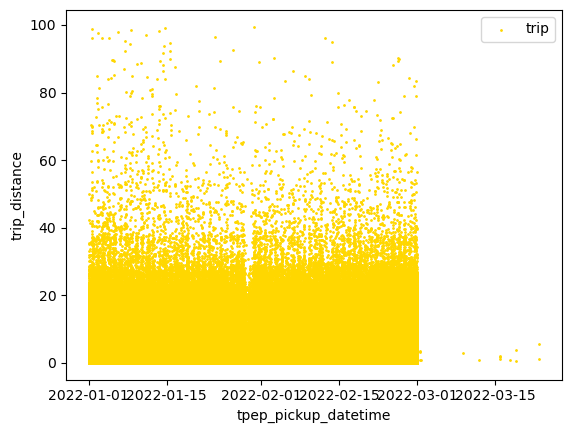

In [18]:
df_yellow_sorted_dates.plot(x='tpep_pickup_datetime', y='trip_distance', kind='scatter', label='trip', s=1, c='gold')

<Axes: xlabel='lpep_pickup_datetime', ylabel='trip_distance'>

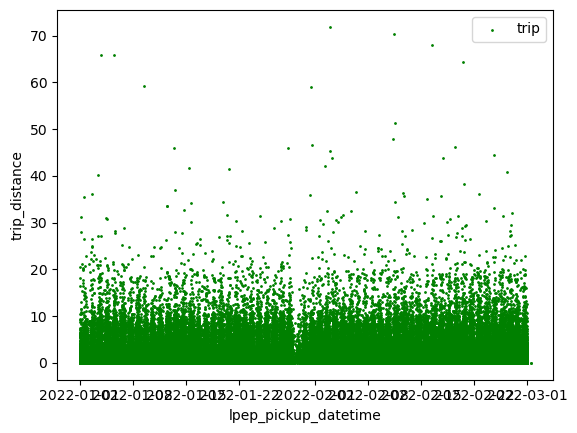

In [19]:
df_green_sorted_dates.plot(x='lpep_pickup_datetime', y='trip_distance', kind='scatter', label='trip', s=1, c='green')

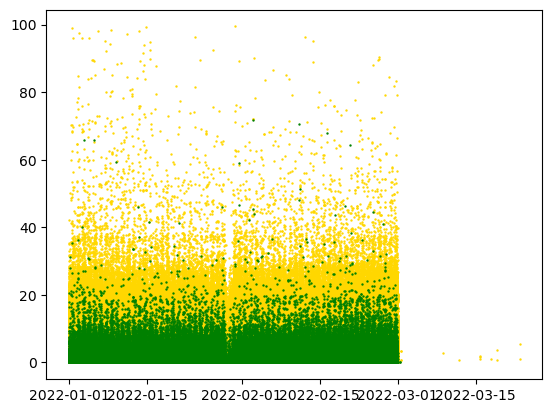

In [20]:
plt.scatter(df_yellow_sorted_dates['tpep_pickup_datetime'], df_yellow_sorted_dates['trip_distance'], s=0.5, c='gold')  # Scatter plot
plt.scatter(df_green_sorted_dates['lpep_pickup_datetime'], df_green_sorted_dates['trip_distance'], s=0.5, c='green')  # Line plot
plt.show()

We made a lower and upper bound for the data set to remove some of the data that will make the plots unreadable
Then we made a scatterplot for how far the trip distances are, first for yellow, then green and then on with both so we can se them compared to each other

We can see that most of the trips for the green taxi is about half the distance of the yellow
The scatter plots start to become further from each other at 30 wheres as the green starts at around 10

So we can conclude that people mostly take the green taxies for shorter trips whereas more people take the yellow if they are going a bit further

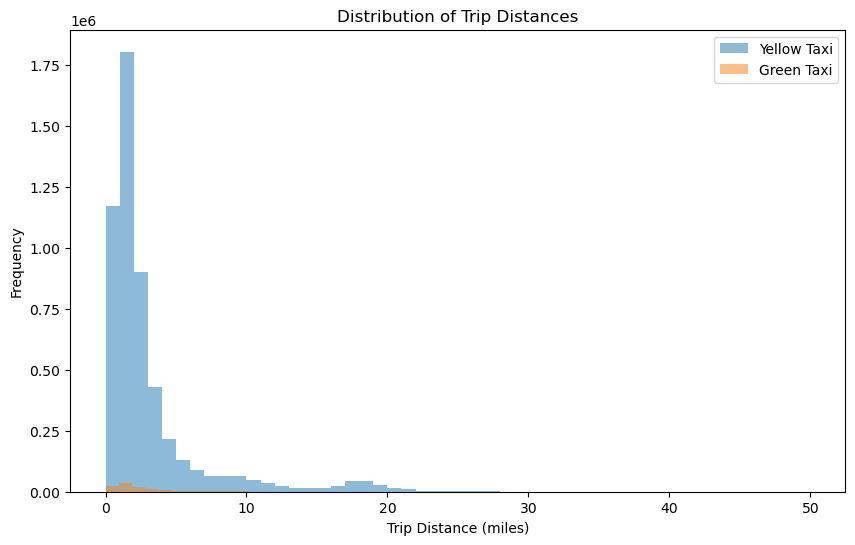

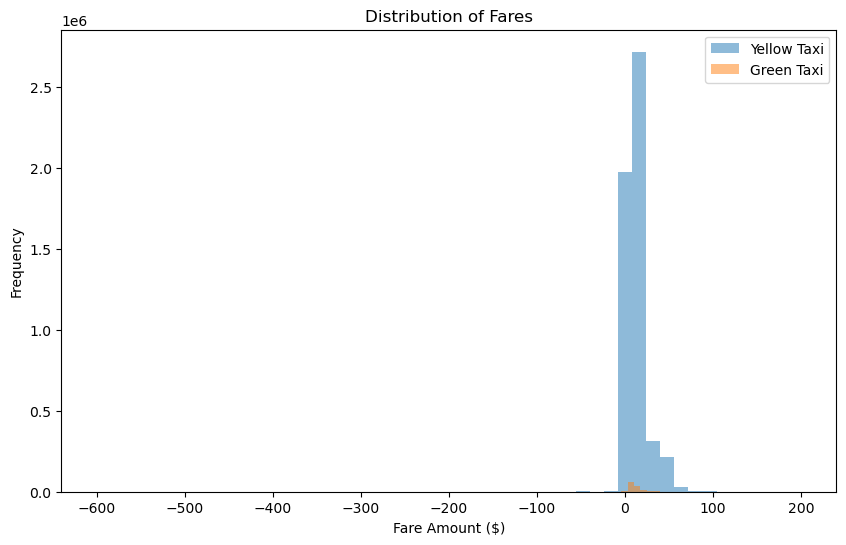

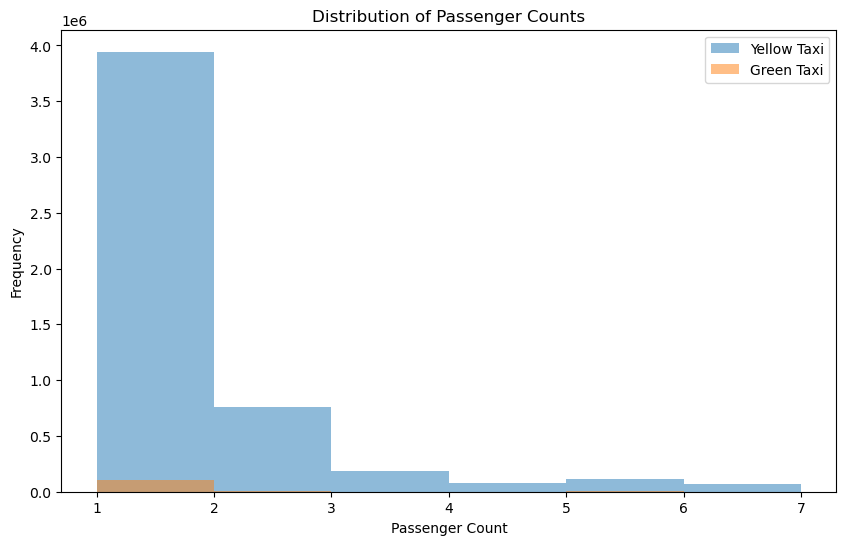

In [ ]:
# Load the yellow and green taxi dataframes
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

# Set reasonable thresholds for filtering the data
max_trip_distance = 50  # Maximum trip distance in miles
max_fare_amount = 200  # Maximum fare amount in dollars
max_passenger_count = 6  # Maximum number of passengers

# Filter the data based on the defined thresholds
df_yellow_filtered = df_yellow[
    (df_yellow['trip_distance'] <= max_trip_distance) &
    (df_yellow['fare_amount'] <= max_fare_amount) &
    (df_yellow['passenger_count'] <= max_passenger_count)
]

df_green_filtered = df_green[
    (df_green['trip_distance'] <= max_trip_distance) &
    (df_green['fare_amount'] <= max_fare_amount) &
    (df_green['passenger_count'] <= max_passenger_count)
]

# Explore trip distances
plt.figure(figsize=(10, 6))
plt.hist(df_yellow_filtered['trip_distance'], bins=50, alpha=0.5, label='Yellow Taxi')
plt.hist(df_green_filtered['trip_distance'], bins=50, alpha=0.5, label='Green Taxi')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.legend()
plt.show()

# Explore fares
plt.figure(figsize=(10, 6))
plt.hist(df_yellow_filtered['fare_amount'], bins=50, alpha=0.5, label='Yellow Taxi')
plt.hist(df_green_filtered['fare_amount'], bins=50, alpha=0.5, label='Green Taxi')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Fares')
plt.legend()
plt.show()

# Explore passenger counts
plt.figure(figsize=(10, 6))
plt.hist(df_yellow_filtered['passenger_count'], bins=range(1, max_passenger_count + 2), alpha=0.5, label='Yellow Taxi')
plt.hist(df_green_filtered['passenger_count'], bins=range(1, max_passenger_count + 2), alpha=0.5, label='Green Taxi')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Counts')
plt.legend()
plt.show()

# Relationship between trip distance and fare amount
plt.figure(figsize=(10, 6))
plt.scatter(df_yellow_filtered['trip_distance'], df_yellow_filtered['fare_amount'], alpha=0.5, label='Yellow Taxi')
plt.scatter(df_green_filtered['trip_distance'], df_green_filtered['fare_amount'], alpha=0.5, label='Green Taxi')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Load the yellow and green taxi dataframes
df_yellow_1 = pd.concat(df_yellow_list)
df_green_1 = pd.concat(df_green_list)

# Set reasonable thresholds for filtering the data
max_trip_distance = 50  # Maximum trip distance in miles
max_fare_amount = 200  # Maximum fare amount in dollars
max_passenger_count = 6  # Maximum number of passengers

# Filter the data based on the defined thresholds
df_yellow_filtered = df_yellow[
    (df_yellow['trip_distance'] <= max_trip_distance) &
    (df_yellow['fare_amount'] <= max_fare_amount) &
    (df_yellow['passenger_count'] <= max_passenger_count)
]

df_green_filtered = df_green[
    (df_green['trip_distance'] <= max_trip_distance) &
    (df_green['fare_amount'] <= max_fare_amount) &
    (df_green['passenger_count'] <= max_passenger_count)
]

# Sample a subset of the data for plotting
sample_size = 1000
df_yellow_sample = df_yellow_filtered.sample(n=sample_size, random_state=42)
df_green_sample = df_green_filtered.sample(n=sample_size, random_state=42)

# Explore trip distances
plt.figure(figsize=(10, 6))
plt.hist(df_yellow_sample['trip_distance'], bins=50, alpha=0.5, label='Yellow Taxi')
plt.hist(df_green_sample['trip_distance'], bins=50, alpha=0.5, label='Green Taxi')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.legend()
plt.show()

# Explore fares
plt.figure(figsize=(10, 6))
plt.hist(df_yellow_sample['fare_amount'], bins=50, alpha=0.5, label='Yellow Taxi')
plt.hist(df_green_sample['fare_amount'], bins=50, alpha=0.5, label='Green Taxi')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Fares')
plt.legend()
plt.show()

# Explore passenger counts
plt.figure(figsize=(10, 6))
plt.hist(df_yellow_sample['passenger_count'], bins=range(1, max_passenger_count + 2), alpha=0.5, label='Yellow Taxi')
plt.hist(df_green_sample['passenger_count'], bins=range(1, max_passenger_count + 2), alpha=0.5, label='Green Taxi')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Counts')
plt.legend()
plt.show()

# Relationship between trip distance and fare amount
plt.figure(figsize=(10, 6))
plt.scatter(df_yellow_sample['trip_distance'], df_yellow_sample['fare_amount'], alpha=0.5, label='Yellow Taxi')
plt.scatter(df_green_sample['trip_distance'], df_green_sample['fare_amount'], alpha=0.5, label='Green Taxi')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.legend()
plt.show()

We then made bar chart for how many times the each trip distance occurs, then did the same with the fare amount and last with how any passangers there is per trip. We then made a scatter plot with the realationsship between trip distance and fare amount.

we saw that there is alot more data with the yellow taxi, so we set the sample size for both of them to 1000

We can see on the first bar chart that most people will take a taxi, both green and yellow, when they need to travel 1-4 miles.
The same can be seen in the fare amount chart, that most of the trip are in the cheap end of the chart which connects to the more shorter distances
In the next chart we can see that most of the trips is only with one passanger, its around 3 times more trips with 1 passanger than with 2
In the scatter plot we can se that there is almost linear regression, so there further the trip the more expensive the trip

From these charts we can conclude that most of the taxi trips in New York, both the yellow and green, is with one passanger and fairly short trips furthest is 4 miles

In [ ]:
# Step 3: Visualize Data Distributions

# Boxplots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_yellow_sample, x=df_yellow_sample['trip_distance'])
plt.xlabel('Trip Distance')
plt.title('Yellow Taxi')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_yellow_sample, x=df_yellow_sample['fare_amount'])
plt.xlabel('Fare')
plt.title('Yellow Taxi')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_yellow_sample, x=df_yellow_sample['passenger_count'])
plt.xlabel('Passenger Count')
plt.title('Yellow Taxi')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_green_sample, x=df_green_sample['trip_distance'])
plt.xlabel('Trip Distance')
plt.title('Green Taxi')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_green_sample, x=df_green_sample['fare_amount'])
plt.xlabel('Fare')
plt.title('Green Taxi')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_green_sample, x=df_green_sample['passenger_count'])
plt.xlabel('Passenger Count')
plt.title('Green Taxi')

plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis
yellow_corr = df_yellow_sample[['trip_distance', 'fare_amount', 'passenger_count']].corr()
green_corr = df_green_sample[['trip_distance', 'fare_amount', 'passenger_count']].corr()
print("Yellow Dataset Correlation Matrix:")
print(yellow_corr)
print("\nGreen Dataset Correlation Matrix:")
print(green_corr)

From all these plots, charts and data we can say that there is a relationsship between the to data set, there is the same distribution for the trip distances and fare amount. There is a pattern aswell in both of the data set which shows the most taxi trips is with one passanger and are shorter distances. When we see the mean number for passagners it is 1.2 which corolates with the shown charts, where most of the trips are with one and a lot fewer are with 2 or more.


### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [ ]:
df_zones.head(5)

Before we start with task 3, we just import the "libraries" we need

In [ ]:
pip install keplergl --quiet

In [ ]:
import geopandas as gpd
from keplergl import KeplerGl


We can now begin task 3. 
Here we start by sorting the data and thus deleting any of the column we do not need. 

In [ ]:
df_yellow_3=df_yellow.dropna().drop(columns=["RatecodeID","store_and_fwd_flag","payment_type","mta_tax","tolls_amount","improvement_surcharge","congestion_surcharge","airport_fee"])

df_green_3=df_green.drop(columns=["RatecodeID","trip_type","store_and_fwd_flag","payment_type","mta_tax","tolls_amount","improvement_surcharge","congestion_surcharge"])

since as prviously described, we must ude longitude and latitude from df_zones, in addition we must use the location for dropp off and pick up that we get from the data - we therefor need to merge thoese "to" 

In [ ]:
df_yellow_3_combined = pd.merge(df_yellow, df_zones[['LocationID', 'lat', 'lng']], left_on='PULocationID', right_on='LocationID')
df_green_3_combined = pd.merge(df_green, df_zones[['LocationID', 'lat', 'lng']], left_on='PULocationID', right_on='LocationID')

In [ ]:
#we start by selecting a sample of the data 
df_yellow_sample_1 = df_yellow_3_combined.sample(n=1000)
df_green_sample_1 = df_green_3_combined.sample(n=1000)

#we now use geopandas 
gdf_yellow = gpd.GeoDataFrame(df_yellow_sample_1, geometry=gpd.points_from_xy(df_yellow_sample_1['lng'], df_yellow_sample_1['lat']))
gdf_green = gpd.GeoDataFrame(df_green_sample_1, geometry=gpd.points_from_xy(df_green_sample_1['lng'], df_green_sample_1['lat']))

#creating a map
map_1 = KeplerGl(height=600)

#adds the data to the map 
map_1.add_data(data=gdf_yellow, name='Yellow Taxi')
map_1.add_data(data=gdf_green, name='Green Taxi')


map_1

On the map above, we can see the yellow and green taxis' pick ups, here the colors are sorted by trip distance which you can see by pressing "show legend" 

we are now doing it again, but for drop off location

In [ ]:
df_yellow_3_combined_2 = pd.merge(df_yellow, df_zones[['LocationID', 'lat', 'lng']], left_on='DOLocationID', right_on='LocationID')
df_green_3_combined_2 = pd.merge(df_green, df_zones[['LocationID', 'lat', 'lng']], left_on='DOLocationID', right_on='LocationID')

In [ ]:
#we start by selecting a sample of the data
df_yellow_sample_2 = df_yellow_3_combined_2.sample(n=1000)
df_green_sample_2 = df_green_3_combined_2.sample(n=1000)

#we now use geopandas 
gdf_yellow_2 = gpd.GeoDataFrame(df_yellow_sample_2, geometry=gpd.points_from_xy(df_yellow_sample_2['lng'], df_yellow_sample_2['lat']))
gdf_green_2 = gpd.GeoDataFrame(df_green_sample_2, geometry=gpd.points_from_xy(df_green_sample_2['lng'], df_green_sample_2['lat']))

#creating a map
map_2 = KeplerGl(height=600)

#adds the data to the map
map_2.add_data(data=gdf_yellow_2, name='Yellow Taxi')
map_2.add_data(data=gdf_green_2, name='Green Taxi')

map_2

In the Kepler map above, we can see the drop off location - for the yellow and green taxis

we can conclude that the biggest hotspots are in the popular part of the city, areas like the main city and the airport. in addition, we can see that there is a greater proportion of longer trips for drop off than pick up. there are also many more drop offs outside the main city than there are pick ups,pick ups mostly happen in the main city. 

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [ ]:
# Step 1: Convert pickup datetime column to datetime format
df_yellow_2['tpep_pickup_datetime'] = pd.to_datetime(df_yellow_2['tpep_pickup_datetime'])
df_green_2['lpep_pickup_datetime'] = pd.to_datetime(df_green_2['lpep_pickup_datetime'])

# Step 2: Extract time-based features
df_yellow_2['hour'] = df_yellow_2['tpep_pickup_datetime'].dt.hour
df_yellow_2['day_of_week'] = df_yellow_2['tpep_pickup_datetime'].dt.dayofweek
df_yellow_2['month'] = df_yellow_2['tpep_pickup_datetime'].dt.month

df_green_2['hour'] = df_green_2['lpep_pickup_datetime'].dt.hour
df_green_2['day_of_week'] = df_green_2['lpep_pickup_datetime'].dt.dayofweek
df_green_2['month'] = df_green_2['lpep_pickup_datetime'].dt.month

In [ ]:
# Step 3: Analyze the number of rides by time of day
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df_yellow_2, x='hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Yellow Taxi: Number of Rides by Hour')

plt.subplot(1, 2, 2)
sns.countplot(data=df_green_2, x='hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Green Taxi: Number of Rides by Hour')

plt.tight_layout()
plt.show()

We started by sorting the data so we could use it for making the charts

We made a bar chart of all the hours of the day, for both the yellow and green taxi, where we can see how many taxi rides there is per hour. We can see that for the yellow taxi, most of the rides are at 19, and for the green it is at 16. The yellow taxi is also the one that is used mostly in the evening and night.

In [ ]:
# Step 4: Analyze the number of rides by day of the week
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df_yellow_2, x='day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.title('Yellow Taxi: Number of Rides by Day of Week')

plt.subplot(1, 2, 2)
sns.countplot(data=df_green_2, x='day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.title('Green Taxi: Number of Rides by Day of Week')

plt.tight_layout()
plt.show()

Now instead of hours a day, we are looking at days of the week, as we can see sunday is the day of the week where there is the fewest taxi trips, and the weekend (friday and saturday) is the days with the most trips. We can see that for both of them it is at its lowest on sunday and goes up all the days of the week

In [ ]:
# Step 5: Analyze the number of rides by month
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df_yellow_2, x='month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Yellow Taxi: Number of Rides by Month')

plt.subplot(1, 2, 2)
sns.countplot(data=df_green_2, x='month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Green Taxi: Number of Rides by Month')

plt.tight_layout()
plt.show()

In this chart we are showing the difference in the months, in the start we only used 2 months so we can not conclude alot from this, other than there are alot more taxi trips in febuary than in january.

In [ ]:
# Step 6: Analyze the relationship between temporal patterns and other variables
# Example: Relationship between hour of day and trip distance
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_yellow_2, x='hour', y='trip_distance')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Distance')
plt.title('Yellow Taxi: Hour of Day vs. Trip Distance')
plt.show()

We also made a scatter plot here showing the same as earlier, where we show how many trips there are in the different hours of the day.

We can conclude from this that there is most trips for both the yellow and green taxi in the afternoons on friday and saturday, there is a clear pattern of this.

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [ ]:
# Assuming you have a dataframe called 'df_yellow' containing the taxi data

# Randomly select and keep 1000 rows
df_yellow_sample = df_yellow_sorted_dates.sample(n=1000, random_state=42)
df_green_sample = df_green_sorted_dates.sample(n=1000, random_state=42)

In [ ]:
# Remove the time component
df_yellow_2['tpep_pickup_datetime'] = df_yellow_2['tpep_pickup_datetime'].dt.floor('D')
df_green_2['lpep_pickup_datetime'] = df_green_2['lpep_pickup_datetime'].dt.floor('D')

In [ ]:
# Preprocess the data
df_yellow_2['tpep_pickup_datetime'] = pd.to_datetime(df_yellow_2['tpep_pickup_datetime'])

# Calculate the count per day
count_per_day_y = df_yellow_2.groupby('tpep_pickup_datetime').size().reset_index(name='count')

print(count_per_day_y)

In [ ]:
# Preprocess the data
df_green_2['lpep_pickup_datetime'] = pd.to_datetime(df_green_2['lpep_pickup_datetime'])

# Calculate the count per day
count_per_day_g = df_green_2.groupby('lpep_pickup_datetime').size().reset_index(name='count')

print(count_per_day_g)

In [ ]:
# Preprocessing the data
count_per_day_y['tpep_pickup_datetime'] = pd.to_datetime(count_per_day_y['tpep_pickup_datetime'])
count_per_day_y['count'] = count_per_day_y['count'].astype(float)

count_per_day_g['lpep_pickup_datetime'] = pd.to_datetime(count_per_day_g['lpep_pickup_datetime'])
count_per_day_g['count'] = count_per_day_g['count'].astype(float)

# Creating the time-series model
model_yellow = Prophet()
model_green = Prophet()

In [ ]:
# Renaming the columns as required by Prophet
count_per_day_y.rename(columns={"tpep_pickup_datetime":"ds","count":"y"}, inplace=True)
count_per_day_g.rename(columns={"lpep_pickup_datetime":"ds", "count":"y"}, inplace=True)

# Training the models
model_yellow.fit(count_per_day_y)
model_green.fit(count_per_day_g)

# Forecasting future values
future_yellow = model_yellow.make_future_dataframe(periods=60)  # Forecasting for 60 days
forecast_yellow = model_yellow.predict(future_yellow)

future_green = model_green.make_future_dataframe(periods=60)  # Forecasting for 60 days
forecast_green = model_green.predict(future_green)

# Visualizing the forecast
model_yellow.plot(forecast_yellow, xlabel='Date', ylabel='Number of Taxi Rides')
plt.title('Forecast for Yellow Taxis')
plt.show()

model_green.plot(forecast_green, xlabel='Date', ylabel='Number of Taxi Rides')
plt.title('Forecast for Green Taxis')
plt.show()



### Conclusion on the charts 

##### Chart 1 - Forecast for Yellow Taxis
We can conclude here that there is approximately a linear trend

##### Chart 2 - Forecast for Green Taxis
For the green taxis, it would also be possible to describe the data based on a linear model based on regression 

##### what can we use it for? 
From linear regression, we can predict the future appproximately

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.

Type Markdown and LaTeX:  𝛼^2